Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 0.6898 - accuracy: 0.6417
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6726 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.6401
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.6401
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.6694
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7736
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5134 - accuracy: 0.7769
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7720
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7638
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7704
Epoch 11/

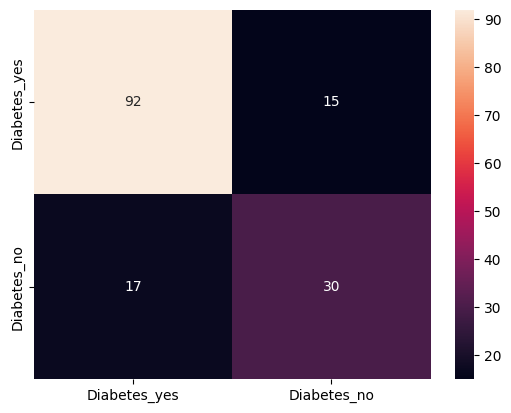

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset
dataset = pd.read_csv('diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=8),
    tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Make Predictions
y_pred = (classifier.predict(X_test) > 0.5)

# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
sns.heatmap(cm, fmt=".0f", xticklabels=['Diabetes_yes', 'Diabetes_no'],
            yticklabels=['Diabetes_yes', 'Diabetes_no'], annot=True)

# Predict a New Data Point
new_data = np.array([[1, 97, 64, 0, 0, 25.6, 0.201, 30]])
new_data = sc.transform(new_data)
outcome = classifier.predict(new_data)
print("The Outcome of the Patient is:", "Diabetes" if outcome > 0.5 else "No Diabetes")

# Calculate Performance Metrics
TP, FP, FN, TN = cm.ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)
FDR = FP / (TP + FP)
ACC = (TP + TN) / (TP + FP + FN + TN)

print("Recall:", TPR)
print("Specificity:", TNR)
print("Precision:", PPV)
print("Negative Predictive Value:", NPV)
print("False Positive Rate:", FPR)
print("False Negative Rate:", FNR)
print("False Discovery Rate:", FDR)
print("Accuracy:", ACC)

In [73]:
datasett = dataset. iloc[:, :-1]
datasett

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Inspection see's 0 values for Insulin, preprocessing needed?

[Text(0, 1, 'Pregnancies'),
 Text(0, 2, 'Glucose'),
 Text(0, 3, 'BloodPressure'),
 Text(0, 4, 'SkinThickness'),
 Text(0, 5, 'Insulin'),
 Text(0, 6, 'BMI'),
 Text(0, 7, 'DiabetesPedigreeFunction'),
 Text(0, 8, 'Age')]

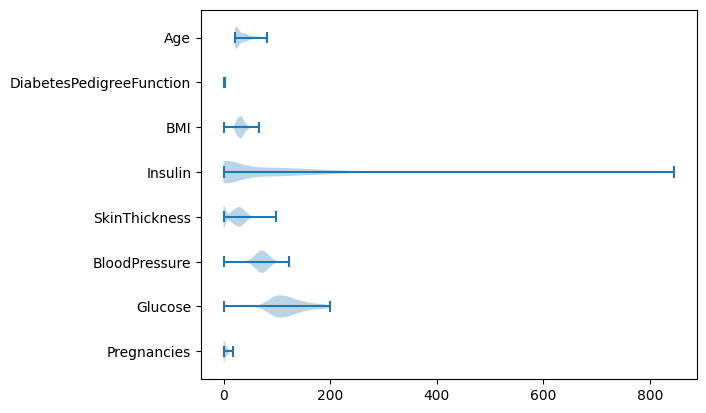

In [97]:
import matplotlib.pyplot as plt
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(datasett.columns)
plt.figure()
ax = plt.subplot(111)
plt.violinplot(datasett,pos, vert=False)
ax.set_yticks(pos)
ax.set_yticklabels(label)


Large Range for Insulin values suggests data should be inspected fro outliers?

(-20.0, 240.0)

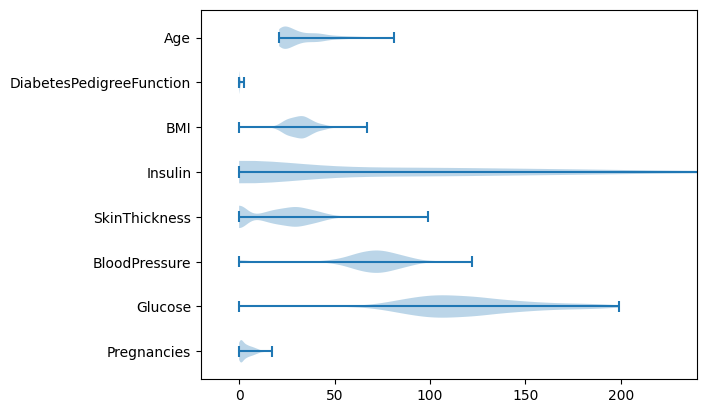

In [98]:
import matplotlib.pyplot as plt
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(datasett.columns)
plt.figure()
ax = plt.subplot(111)
plt.violinplot(datasett,pos, vert=False)
ax.set_yticks(pos)
ax.set_yticklabels(label)

ax.set_xlim(left=-20, right=240)

Skin Thickness seems to have alot of near 0 values, Is this right?

Epoch 1/100
62/62 [==============================] - 1s 1ms/step - loss: 0.6887 - accuracy: 0.6417
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 0.6612 - accuracy: 0.6401
Epoch 3/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.6401
Epoch 4/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.6889
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7590
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 0.5115 - accuracy: 0.7590
Epoch 7/100
62/62 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7590
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.7687
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4890 - accuracy: 0.7720
Epoch 10/100
62/62 [==============================] - 0s 2ms/step - loss: 0.4852 - accuracy: 0.7752
Epoch 11/

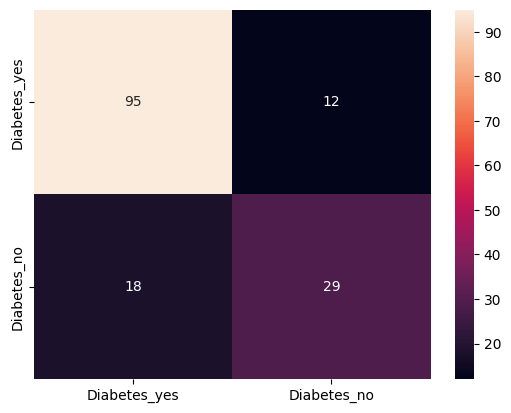

In [7]:

import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset
dataset2 = pd.read_csv('diabetes.csv')
dataset2['Insulin']=dataset2['Insulin'].replace(0,dataset2['Insulin'].mean())
dataset2['SkinThickness']=dataset2['SkinThickness'].replace(0,dataset2['SkinThickness'].mean())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build the ANN
classifier = tf.keras.Sequential([
    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='uniform', input_dim=8),
    tf.keras.layers.Dense(units=8, kernel_initializer='uniform', activation='relu'),
    tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')
])

# Compile the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

# Make Predictions
y_pred = (classifier.predict(X_test) > 0.5)

# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
sns.heatmap(cm, fmt=".0f", xticklabels=['Diabetes_yes', 'Diabetes_no'],
            yticklabels=['Diabetes_yes', 'Diabetes_no'], annot=True)

# Predict a New Data Point
new_data = np.array([[1, 97, 64, 0, 0, 25.6, 0.201, 30]])
new_data = sc.transform(new_data)
outcome = classifier.predict(new_data)
print("The Outcome of the Patient is:", "Diabetes" if outcome > 0.5 else "No Diabetes")

# Calculate Performance Metrics
TP, FP, FN, TN = cm.ravel()
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
PPV = TP / (TP + FP)
NPV = TN / (TN + FN)
FPR = FP / (FP + TN)
FNR = FN / (TP + FN)
FDR = FP / (TP + FP)
ACC = (TP + TN) / (TP + FP + FN + TN)

print("Recall:", TPR)
print("Specificity:", TNR)
print("Precision:", PPV)
print("Negative Predictive Value:", NPV)
print("False Positive Rate:", FPR)
print("False Negative Rate:", FNR)
print("False Discovery Rate:", FDR)
print("Accuracy:", ACC)


<H1>Note: No seed has been set and so we expect different values on each Run. However, there is a recurring improvement over original data</H1>

| Original Code|Preprocessed|
| --- | --- | 
| Recall: 0.8440366972477065|Recall: 0.8392857142857143|
| --- | --- | 
|Specificity: 0.6666666666666666|Specificity: 0.6904761904761905|
| --- | --- | 
|Precision: 0.8598130841121495|Precision: 0.8785046728971962|
| --- | --- | 
|Negative Predictive Value: 0.6382978723404256|Negative Predictive Value: 0.6170212765957447|
| --- | --- | 
|False Positive Rate: 0.3333333333333333|False Positive Rate: 0.30952380952380953|
| --- | --- | 
|False Negative Rate: 0.1559633027522936|False Negative Rate: 0.16071428571428573|
| --- | --- | 
|False Discovery Rate: 0.14018691588785046|False Discovery Rate: 0.12149532710280374|
| --- | --- | 
|Accuracy: 0.7922077922077922|Accuracy: 0.7987012987012987




[Text(0, 1, 'Pregnancies'),
 Text(0, 2, 'Glucose'),
 Text(0, 3, 'BloodPressure'),
 Text(0, 4, 'SkinThickness'),
 Text(0, 5, 'Insulin'),
 Text(0, 6, 'BMI'),
 Text(0, 7, 'DiabetesPedigreeFunction'),
 Text(0, 8, 'Age')]

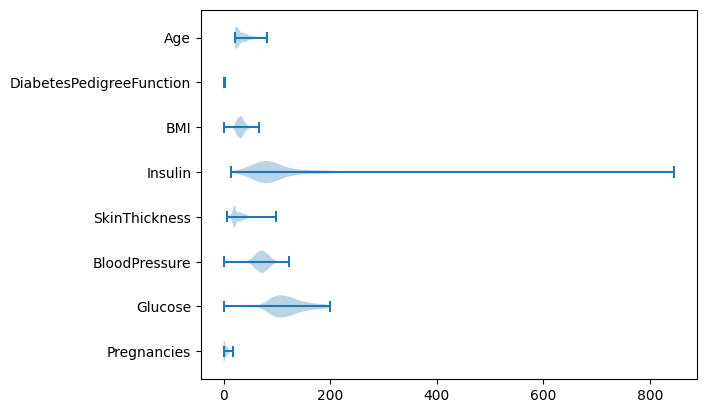

In [10]:
dataset3 = dataset2. iloc[:, :-1]
dataset3
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(dataset3.columns)
plt.figure()
ax = plt.subplot(111)
plt.violinplot(dataset3,pos, vert=False)
ax.set_yticks(pos)
ax.set_yticklabels(label)

(-20.0, 240.0)

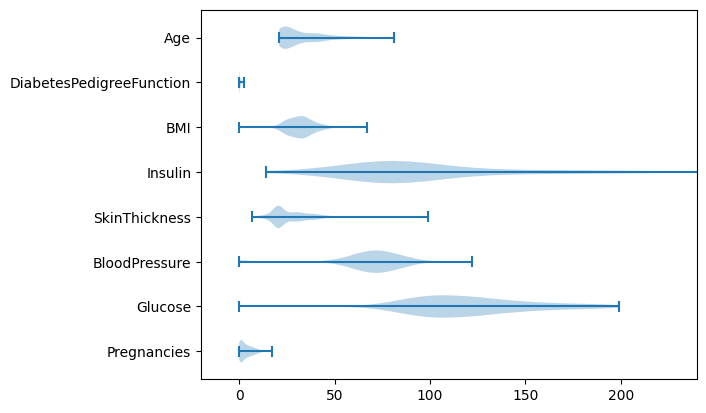

In [11]:
pos   = [1, 2,3, 4, 5,6, 7, 8]
label = list(dataset3.columns)
plt.figure()
ax = plt.subplot(111)
plt.violinplot(dataset3,pos, vert=False)
ax.set_yticks(pos)
ax.set_yticklabels(label)
ax.set_xlim(left=-20, right=240)
